In [7]:
import pandas as pd
import numpy as np
import warnings
import math
from sklearn import linear_model
warnings.filterwarnings('ignore')


In [49]:
df_polytruth = pd.read_csv('poly_truth.tsv',sep='\t')
df_quantboot = pd.read_csv('quant_bootstraps.tsv',sep='\t')
#df_quantboot['ENST00000349363']

# Calculating Transcript Deviation:

In [ ]:
import numpy as np
#df_quantboot['ENST00000382369']

df_polytruth['mean']=0
df_polytruth['std']=0


df_new = df_polytruth
#df_new['transcript_id']

#for i in df_new.columns:
#    print i
#mean = df_quantboot[row].mean()
    #print df_new[df_new['transcript_id']==i]
    #print mean
    #df_polytruth['std']= np.std(df_quantboot[i])
    
    
df_new['mean']=0
df_new['std']=0
df_new['deviation']=0
for index,row in df_new.iterrows():
    #print row
    try:
        mean = df_quantboot[row['transcript_id']].mean()
   
        df_new.loc[df_new.transcript_id==row['transcript_id'],'mean']=mean
    
        std= np.std(df_quantboot[row['transcript_id']])
        df_new.loc[df_new.transcript_id==row['transcript_id'],'std']=std
    #print df_new['std']
        row['std']=std
        row['mean'] = mean
        if row['std']!=0:
        #print abs(row['count']-row['mean'])/row['std']
            df_new.loc[df_new.transcript_id==row['transcript_id'],'deviation']= abs(row['count']-row['mean'])/row['std']
    except:
        pass
    

df_new=df_new.sort_values('deviation', ascending=False)

df_faulty = df_new[df_new['deviation']>2]
    
df_good = df_new[df_new['deviation']<=2]

In [ ]:
df_quantsf = pd.read_csv("quant.sf",sep='\t')
df_faulty_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_good_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_combined = pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation','faulty'])

for index,row in df_faulty.iterrows():
    df_faulty_prop = df_faulty_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'count']=row['count']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'std']=row['std']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=1
    #df_temp.loc[index]=df_quantsf[df_quantsf['Name']==row['transcript_id']]
for index,row in df_good.iterrows():
    df_good_prop = df_good_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'count']=row['count']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'std']=row['std']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=0
#df_quantsf[df_quantsf['Name']=='ENST00000342665']
#df_good_prop

df_good_prop.to_csv("good_prop.csv")

df_faulty_prop.to_csv("faulty_prop.csv")

df_combined.to_csv("combined_result.csv")
df_combined

# Checking Correlations: 

(12713, 10)


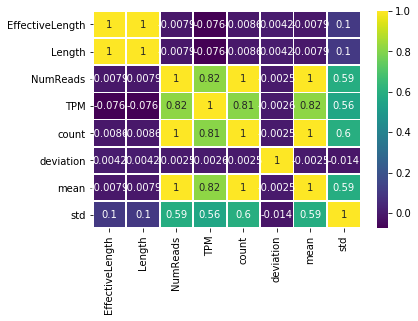

In [4]:
#df_faulty_cor = df_faulty_prop[['Length','deviation']].copy()
import seaborn as sns
import matplotlib.pyplot as plt
df_faulty_prop = pd.read_csv("faulty_prop.csv")
print (df_faulty_prop.shape)
df_faulty_cor = {'Length':df_faulty_prop['Length'],'deviation':df_faulty_prop['deviation'],'count':df_faulty_prop['count'], 'mean':df_faulty_prop['mean'],'std':df_faulty_prop['std'],'EffectiveLength':df_faulty_prop['EffectiveLength'],'TPM':df_faulty_prop['TPM'],'NumReads':df_faulty_prop['NumReads']}
df_faulty_cor = pd.DataFrame(df_faulty_cor).astype('float64')
#r = df_faulty_prop['deviation'].astype('float64').corr(df_faulty_prop['EffectiveLength'].astype('float64'))
#print r
r = df_faulty_cor.corr()
#print r
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
plt.show()

In [ ]:
r = df_good_prop['deviation'].astype('float64').corr(df_good_prop['EffectiveLength'].astype('float64'))
print r

# Linear Regression:

In [8]:
df_res = pd.read_csv("combined_result.csv")
df_temp = {'EffectiveLength':df_res['EffectiveLength'], 'TPM':df_res['TPM'], 'faulty':df_res['faulty']}
df_temp = pd.DataFrame(df_temp)

X = {'EffectiveLength':df_temp['EffectiveLength'], 'TPM':df_temp['TPM']}
X = pd.DataFrame(X)
X = pd.DataFrame(X).values

#X = df_temp['deviation'].values[:,np.newaxis]
y =  df_res['faulty'].values

#length =  df_temp.count()
regr = linear_model.LinearRegression()
regr.fit(X,y)
print (regr.coef_)

#print df_res.shape

[  2.05375521e-05   1.27233156e-04]


# Scatter Plots

RELATION BETWEEN TPM AND DEVIATION FOR GOOD TRANSCRIPTS:

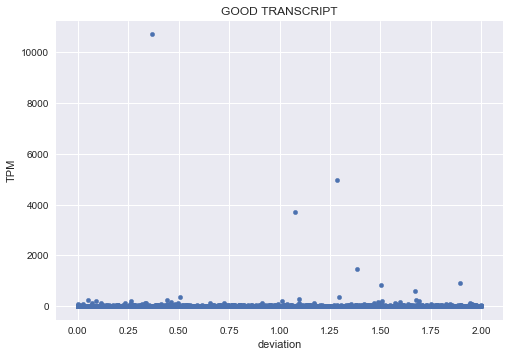

TPM          13084
deviation    13084
dtype: int64


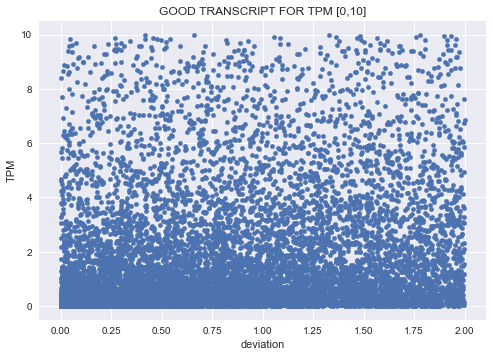

In [56]:
df_good_prop = pd.read_csv("good_prop.csv")
#print df_good_prop.shape
df_temp = {'TPM':df_good_prop['TPM'],'deviation':df_good_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

#df_temp = df_temp[df_temp['TPM']]
df_temp.plot(kind='scatter', x ='deviation', y ='TPM',title= 'GOOD TRANSCRIPT')
plt.show()

df_temp = df_temp[(df_temp['TPM']>=0) & (df_temp['TPM']<=10)]
print df_temp.count()

df_temp.plot(kind='scatter', x ='deviation', y ='TPM',title= 'GOOD TRANSCRIPT FOR TPM [0,10]')
plt.show()

RELATION BETWEEN TPM AND DEVIATION FOR FAULTY TRANSCRIPTS:

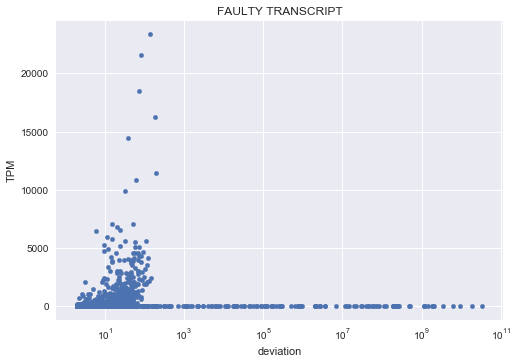

TPM          6421
deviation    6421
dtype: int64


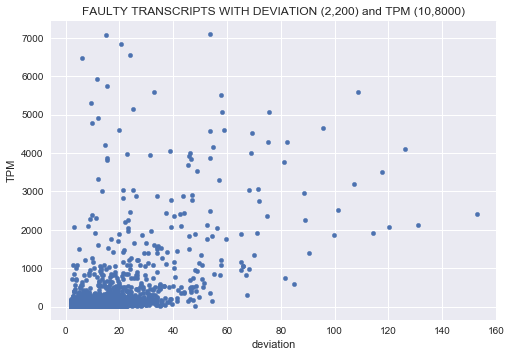

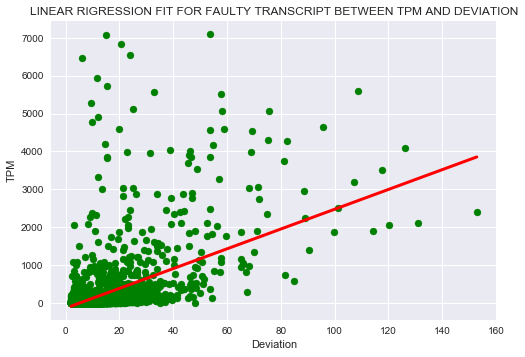

In [59]:

df_temp = {'TPM':df_faulty_prop['TPM'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='TPM',logx=1, title='FAULTY TRANSCRIPT')
plt.show()

#df_temp['deviation'] = df_temp['deviation'].apply(np.log)
df_temp = df_temp[df_temp['deviation']<(200)]
df_temp = df_temp[(df_temp['TPM']>10) & (df_temp['TPM']<8000)]
print df_temp.count()
df_temp.plot(kind='scatter', x ='deviation', y ='TPM', title='FAULTY TRANSCRIPTS WITH DEVIATION (2,200) and TPM (10,8000)')
#plt.ylim((500,8000))
plt.show()


X = df_temp['deviation'].values[:,np.newaxis]
y =  df_temp['TPM'].values
length =  df_temp.count()
regr = linear_model.LinearRegression()
regr.fit(X,y)
plt.scatter(X,y,  color='green')
plt.plot(X, regr.predict(X), color='red', linewidth=3)
plt.xlabel("Deviation")
plt.ylabel("TPM")
plt.title("LINEAR RIGRESSION FIT FOR FAULTY TRANSCRIPT BETWEEN TPM AND DEVIATION")
plt.show()

# Conclusion: For TPM>10, 85% of the Transcripts are faulty.

RELATION BETWEEN EFFECTIVE LENGTH AND DEVIATION FOR GOOD TRANSCRIPTS:

EffectiveLength    11350
deviation          11350
dtype: int64


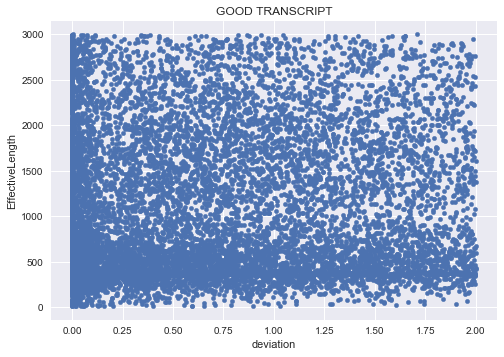

In [72]:
df_good_prop = pd.read_csv("good_prop.csv")
#print df_good_prop.shape
df_temp = {'EffectiveLength':df_good_prop['EffectiveLength'],'deviation':df_good_prop['deviation']}

df_temp = pd.DataFrame(df_temp)
df_temp = df_temp[df_temp['EffectiveLength']<3000]
print df_temp.count()
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength', title= 'GOOD TRANSCRIPT')
plt.show()

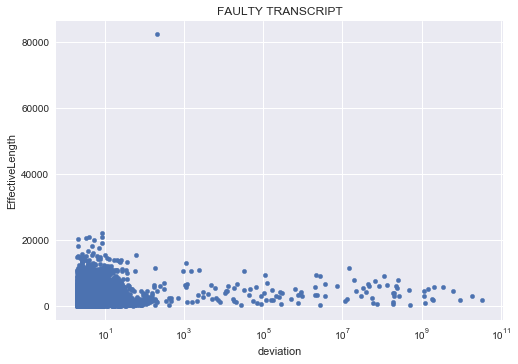

EffectiveLength    9144
deviation          9144
dtype: int64


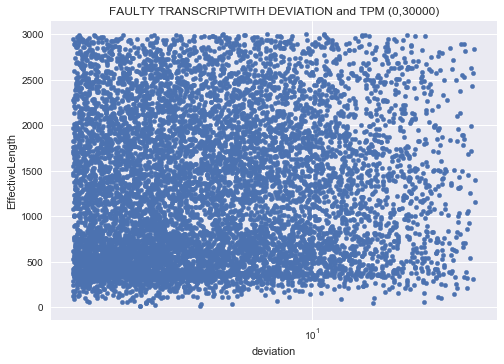

In [77]:
df_temp = {'EffectiveLength':df_faulty_prop['EffectiveLength'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1,title= 'FAULTY TRANSCRIPT')
plt.show()

df_temp = df_temp[df_temp['EffectiveLength']<3000]
df_temp = df_temp[df_temp['deviation']<30]
print df_temp.count()
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1,title= 'FAULTY TRANSCRIPTWITH DEVIATION and TPM (0,30000)')
plt.show()

In [4]:
df_combined = pd.read_csv("combined_result.csv")

df_res = df_combined[df_combined['TPM']>10]

#df_res.to_csv("tpm_rel.csv")
df_res

,Unnamed: 0,EffectiveLength,Length,Name,NumReads,TPM,count,deviation,faulty,mean,std
119,33377,1717.991,1917,ENST00000331789,6.398569e+05,11461.859022,804197,194.825149,1,6.397694e+05,843.975300
120,39633,2103.991,2303,ENST00000309268,1.109005e+06,16221.196261,1316896,187.190755,1,1.109140e+06,1109.859877
129,69915,1709.991,1909,ENST00000559187,1.336241e+05,2404.828061,76399,152.865161,1,1.336203e+05,374.325458
130,93098,1342.991,1542,ENST00000361624,1.019263e+06,23356.420222,1149163,138.085653,1,1.019202e+06,941.162799
132,82800,2729.991,2929,ENST00000219235,1.882310e+05,2121.890666,245467,130.833193,1,1.882922e+05,437.005309
133,44194,857.991,1057,ENST00000426651,1.143235e+05,4100.586674,154462,126.166660,1,1.143163e+05,318.195994
135,88694,2159.991,2359,ENST00000598742,1.453048e+05,2070.241899,193265,120.137960,1,1.453414e+05,398.905119
136,79680,1801.991,2001,ENST00000575087,2.050945e+05,3502.631036,260436,117.695388,1,2.050984e+05,470.176132
137,52143,4716.991,4916,ENST00000314138,2.934764e+05,1914.702258,347898,114.295722,1,2.935314e+05,475.666246
141,24196,2912.991,3112,ENST00000491306,5.283268e+05,5581.572841,605850,108.877620,1,5.283237e+05,712.050176
